# Zeran's final project: Map of 2021 CA county car accident statistics

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [3]:
df1 = pd.read_csv('2021_CA_accident.csv', dtype=object)

In [4]:
df1.head()

,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,City,County,State,Zipcode
0,30/07/2021 23:37,40.908676,-123.707116,40.904856,-123.740056,Salyer,Humboldt,CA,95563
1,09/12/2021 08:51,37.419536,-122.09064,37.410966,-122.076087,Mountain View,Santa Clara,CA,94043
2,17/12/2021 09:59,34.067525,-117.555253,34.083371,-117.63309,Ontario,San Bernardino,CA,91761
3,05/06/2021 11:31,33.136771,-117.171024,33.137891,-117.176274,San Marcos,San Diego,CA,92069
4,14/11/2021 09:05,33.713961,-117.964872,33.708591,-117.958442,Fountain Valley,Orange,CA,92708


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208686 entries, 0 to 208685
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Start_Time  208686 non-null  object
 1   Start_Lat   208686 non-null  object
 2   Start_Lng   208686 non-null  object
 3   End_Lat     208686 non-null  object
 4   End_Lng     208686 non-null  object
 5   City        208684 non-null  object
 6   County      208686 non-null  object
 7   State       208686 non-null  object
 8   Zipcode     208599 non-null  object
dtypes: object(9)
memory usage: 14.3+ MB


In [6]:
df1.County.value_counts()

Los Angeles        58149
San Bernardino     14884
San Diego          13296
Orange             13035
Sacramento         12563
Riverside          10668
Alameda             8359
Kern                6767
Santa Clara         5092
Fresno              4918
San Joaquin         4346
Contra Costa        4006
Ventura             2851
Tulare              2846
Stanislaus          2804
Monterey            2568
Sonoma              2551
Placer              2374
San Mateo           2259
Merced              2226
Santa Barbara       2092
Santa Cruz          1848
San Luis Obispo     1830
Solano              1810
El Dorado           1727
Madera              1592
San Francisco       1369
Marin               1296
Butte               1272
Nevada              1262
Humboldt            1258
Mendocino           1256
Shasta              1222
Yolo                1118
Yuba                 892
Napa                 883
Siskiyou             877
Kings                828
Lake                 771
Tuolumne             753


In [20]:
df = pd.read_csv('CA_car_accident.csv', dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 58 non-null     object
 1   state                58 non-null     object
 2   car_accidents_count  58 non-null     object
 3   county_name          58 non-null     object
dtypes: object(4)
memory usage: 1.9+ KB


In [22]:
df.head()

,year,state,car_accidents_count,county_name
0,2021,CA,58149,Los Angeles
1,2021,CA,14884,San Bernardino
2,2021,CA,13296,San Diego
3,2021,CA,13035,Orange
4,2021,CA,12563,Sacramento


In [17]:
zips_la_gdf = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/notebooks/master/zips/data/processed/ca_zips.geojson"
)

In [9]:
zips_la_gdf.head()

,id,name,county_name,geometry
0,90001,Los Angeles,Los Angeles County,"POLYGON ((-118.24329 33.98901, -118.24754 33.9..."
1,90002,Los Angeles,Los Angeles County,"POLYGON ((-118.23085 33.95772, -118.23108 33.9..."
2,90003,Los Angeles,Los Angeles County,"MULTIPOLYGON (((-118.28268 33.98926, -118.2826..."
3,90004,Los Angeles,Los Angeles County,"MULTIPOLYGON (((-118.33852 34.06891, -118.3371..."
4,90005,Los Angeles,Los Angeles County,"POLYGON ((-118.31879 34.05514, -118.31852 34.0..."


In [10]:
exclude = ["90704", "90274"]

In [11]:
no_islands = zips_la_gdf[~zips_la_gdf["id"].isin(exclude)]

<AxesSubplot:>

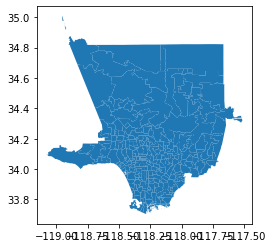

In [12]:
no_islands.plot()

In [ ]:
# The number of car accidents in every county in CA.

In [26]:
ca_gdf = pd.merge(no_islands, df, left_on="name", right_on="county_name", how="left"
).fillna(0)

In [27]:
ca_gdf.head()

,id,name,county_name_x,geometry,year,state,car_accidents_count,county_name_y
0,90001,Los Angeles,Los Angeles County,"POLYGON ((-118.24329 33.98901, -118.24754 33.9...",2021,CA,58149,Los Angeles
1,90002,Los Angeles,Los Angeles County,"POLYGON ((-118.23085 33.95772, -118.23108 33.9...",2021,CA,58149,Los Angeles
2,90003,Los Angeles,Los Angeles County,"MULTIPOLYGON (((-118.28268 33.98926, -118.2826...",2021,CA,58149,Los Angeles
3,90004,Los Angeles,Los Angeles County,"MULTIPOLYGON (((-118.33852 34.06891, -118.3371...",2021,CA,58149,Los Angeles
4,90005,Los Angeles,Los Angeles County,"POLYGON ((-118.31879 34.05514, -118.31852 34.0...",2021,CA,58149,Los Angeles


<AxesSubplot:>

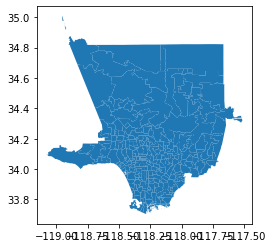

In [28]:
ca_gdf.plot()

In [29]:
ca_gdf.to_file(
    "ca_gdf.geojson", driver="GeoJSON"
)

In [ ]:
# The location of every car accident

In [30]:
ca_gdf1 = pd.merge(no_islands, df1, left_on="id", right_on="Zipcode", how="left"
).fillna(0)

In [33]:
ca_gdf1.head()

,id,name,county_name,geometry,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,City,County,State,Zipcode
0,90001,Los Angeles,Los Angeles County,"POLYGON ((-118.24329 33.98901, -118.24754 33.9...",14/12/2021 22:39,33.962998,-118.237936,33.965204,-118.237949,Los Angeles,Los Angeles,CA,90001
1,90001,Los Angeles,Los Angeles County,"POLYGON ((-118.24329 33.98901, -118.24754 33.9...",19/12/2021 15:22,33.974732,-118.238982,33.974673,-118.233776,Los Angeles,Los Angeles,CA,90001
2,90001,Los Angeles,Los Angeles County,"POLYGON ((-118.24329 33.98901, -118.24754 33.9...",06/05/2021 05:36,33.974749,-118.244774,33.974674,-118.234669,Los Angeles,Los Angeles,CA,90001
3,90001,Los Angeles,Los Angeles County,"POLYGON ((-118.24329 33.98901, -118.24754 33.9...",47:00.0,33.980805,-118.256442,33.982023,-118.255615,Los Angeles,Los Angeles,CA,90001
4,90001,Los Angeles,Los Angeles County,"POLYGON ((-118.24329 33.98901, -118.24754 33.9...",28/10/2021 11:54,33.974395,-118.238083,33.974023,-118.238085,Los Angeles,Los Angeles,CA,90001


<AxesSubplot:>

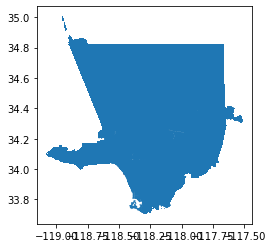

In [31]:
ca_gdf1.plot()

In [32]:
ca_gdf1.to_file(
    "ca_gdf1.geojson", driver="GeoJSON"
)